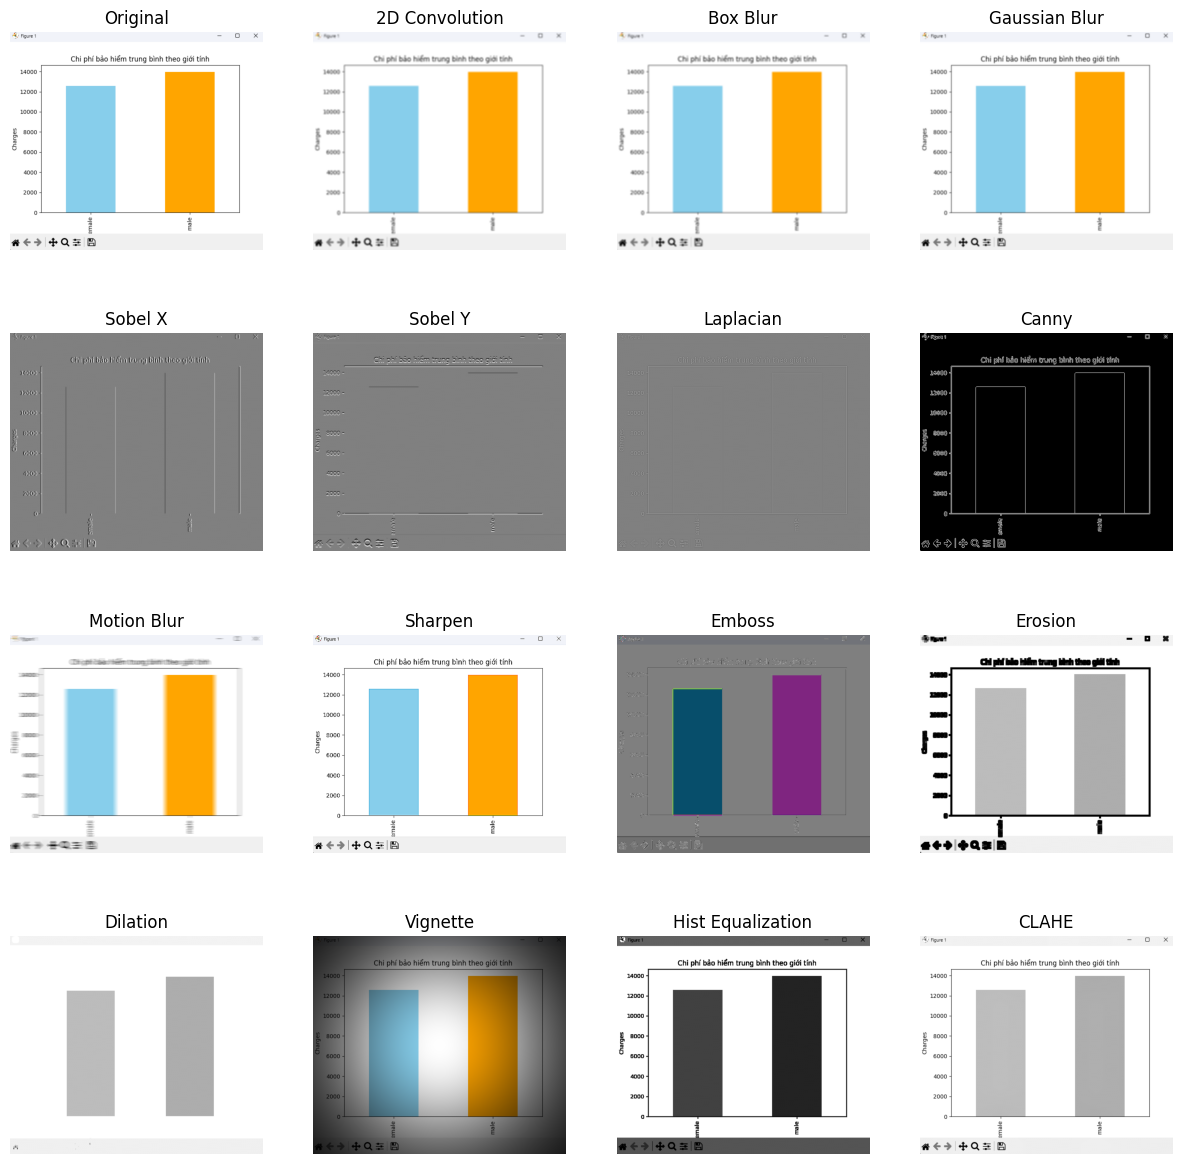

In [3]:
import cv2 # đọc ảnh 
import numpy as np # tạo mt kernel
import matplotlib.pyplot as plt # xuất ảnh

# Đọc ảnh
img = cv2.imread(r"D:\anh\3.png") # ban đầu cv2 đọc thành BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # chuyển sang RGB để hiển thị đúng màu ( Đỏ,lục,lam ) 

# 1. 2D Convolution (Tích chập cơ bản) ( nhân hai ma trận với nhau ) => mịn hơn, ít nhiễu 
kernel = np.ones((5,5), np.float32) / 25
conv2d = cv2.filter2D(img, -1, kernel) # thực hiện tích chập hai ma trận 

# 2. Blurring ( làm mờ ảnh ) (Gaussian & Box)
blur_box = cv2.blur(img, (5,5)) # làm mờ trung bình
blur_gauss = cv2.GaussianBlur(img, (5,5), 0) # làm mờ phân bố chuẩn

# 3. Edge Detection ( phát hiện cạnh của ảnh ) 
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # chuyển ảnh về đen trắng
edges_sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3) # tính đh theo chiều x => đường đứng
edges_sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3) # tính đh theo chiều y => đường ngang
edges_laplacian = cv2.Laplacian(gray, cv2.CV_64F)
edges_canny = cv2.Canny(gray, 100, 200) # phát hiện biên

# 4. Motion Blur ( nhòe )
size = 15
kernel_motion = np.zeros((size, size))
kernel_motion[int((size-1)/2), :] = np.ones(size)
kernel_motion = kernel_motion / size
motion_blur = cv2.filter2D(img, -1, kernel_motion)

# 5. Sharpening ( Làm nét ảnh )
kernel_sharp = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpen = cv2.filter2D(img, -1, kernel_sharp) # -1 giữ nguyên độ sâu của ảnh

# 6. Embossing ( hiệu ứng khắc nổi )
kernel_emboss = np.array([[-2,-1,0],[-1,1,1],[0,1,2]]) # - tối + sáng
emboss = cv2.filter2D(img, -1, kernel_emboss) + 128 # mức sáng trung bình 

# 7. Erosion & Dilation (  xử lý ảnh đen trắng ) 
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(gray, kernel, iterations=1) # co vùng trắng , mở vùng đen
dilation = cv2.dilate(gray, kernel, iterations=1) # co vùng đen , mở vùng trắng

# 8. Vignette Filter ( tối viền ảnh ) 
rows, cols = img.shape[:2]
X_resultant_kernel = cv2.getGaussianKernel(cols,200) # trong sáng, ngoài tối
Y_resultant_kernel = cv2.getGaussianKernel(rows,200) # trong sáng, ngoài tối
kernel = Y_resultant_kernel * X_resultant_kernel.T 
mask = kernel / kernel.max()
vignette = np.copy(img)
for i in range(3):
    vignette[:,:,i] = vignette[:,:,i] * mask # Ở giữa ảnh (mask ≈ 1) → giữ nguyên. Ở rìa ngoài (mask < 1) → làm tối đi.

# 9. Contrast Enhancement (Histogram Equalization) ( Tăng cường độ tương phản )
equ = cv2.equalizeHist(gray) #cân bằng histogram.
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray)

# Hiển thị kết quả
titles = [
    "Original", "2D Convolution", "Box Blur", "Gaussian Blur",
    "Sobel X", "Sobel Y", "Laplacian", "Canny",
    "Motion Blur", "Sharpen", "Emboss",
    "Erosion", "Dilation", "Vignette",
    "Hist Equalization", "CLAHE"
]
images = [
    img, conv2d, blur_box, blur_gauss,
    edges_sobelx, edges_sobely, edges_laplacian, edges_canny,
    motion_blur, sharpen, emboss,
    erosion, dilation, vignette,
    equ, clahe_img
]

plt.figure(figsize=(15,15))
for i in range(len(images)):
    plt.subplot(4,4,i+1)
    if len(images[i].shape)==2:
        plt.imshow(images[i], cmap='gray')
    else:
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis("off")

plt.show()


SyntaxError: invalid syntax (3105166860.py, line 1)

D:\Python\Scripts\jupyter.exe
